In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("../data/clean_data_py.csv")

In [6]:
data['descripcion_limpia'].fillna('', inplace=True)

In [7]:
# Crear la matriz DTM como una matriz dispersa
vectorizer_dtm = CountVectorizer()
dtm_matrix = vectorizer_dtm.fit_transform(data['descripcion_limpia'])

# Convertir la matriz dispersa a un DataFrame
dtm_df = pd.DataFrame.sparse.from_spmatrix(dtm_matrix, columns=vectorizer_dtm.get_feature_names_out())

# Mostrar la matriz DTM
print("Matriz DTM:")
print(dtm_df)
#esta se hizo así por tamaño. Se trata de una matriz dispersa

Matriz DTM:
         00  000  0000  00000  000000  00000000  00000000000  000000040  \
0         0    0     0      0       0         0            0          0   
1         0    0     0      0       0         0            0          0   
2         0    0     0      0       0         0            0          0   
3         0    0     0      0       0         0            0          0   
4         0    0     0      0       0         0            0          0   
...      ..  ...   ...    ...     ...       ...          ...        ...   
1604127   0    0     0      0       0         0            0          0   
1604128   0    0     0      0       0         0            0          0   
1604129   0    0     0      0       0         0            0          0   
1604130   0    0     0      0       0         0            0          0   
1604131   0    0     0      0       0         0            0          0   

         00000005  00000010  ...  zyrahuen  zyzy  zz0222014  zza  zzaragoza  \
0       

In [8]:
# Crear el transformador TF-IDF
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(dtm_matrix)

# Convertir la matriz dispersa TF-IDF a un DataFrame
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=vectorizer_dtm.get_feature_names_out())

# Mostrar la matriz TF-IDF
print("\nMatriz TF-IDF:")
print(tfidf_df)



Matriz TF-IDF:
          00  000  0000  00000  000000  00000000  00000000000  000000040  \
0        0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
1        0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
2        0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
3        0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
4        0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
...      ...  ...   ...    ...     ...       ...          ...        ...   
1604127  0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
1604128  0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
1604129  0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
1604130  0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   
1604131  0.0  0.0   0.0    0.0     0.0       0.0          0.0        0.0   

         00000005  00000010  ...  zyrahuen  zyzy  zz0222014  zza  zzara

In [9]:
from sklearn.decomposition import TruncatedSVD

# Reducir dimensionalidad con Truncated SVD
svd = TruncatedSVD(n_components=100)  # Puedes ajustar el número de componentes según tus necesidades
tfidf_reduced = svd.fit_transform(tfidf_matrix)

c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

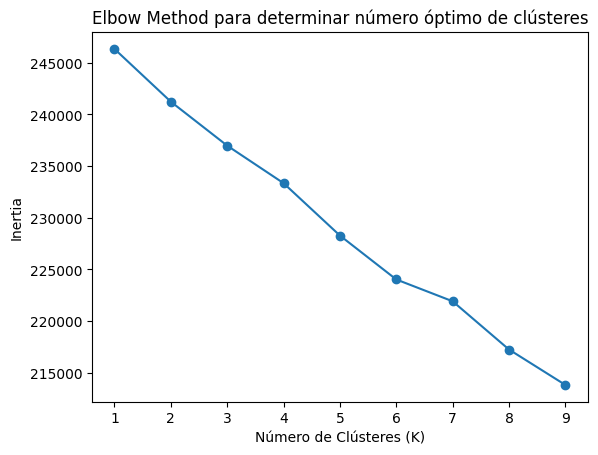

In [13]:
# Determinar el número óptimo de clústeres utilizando Elbow Method
inertia_values = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_reduced)  # Utilizar la matriz reducida en lugar de la original
    inertia_values.append(kmeans.inertia_)

# Graficar Elbow Method
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method para determinar número óptimo de clústeres')
plt.show()

c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

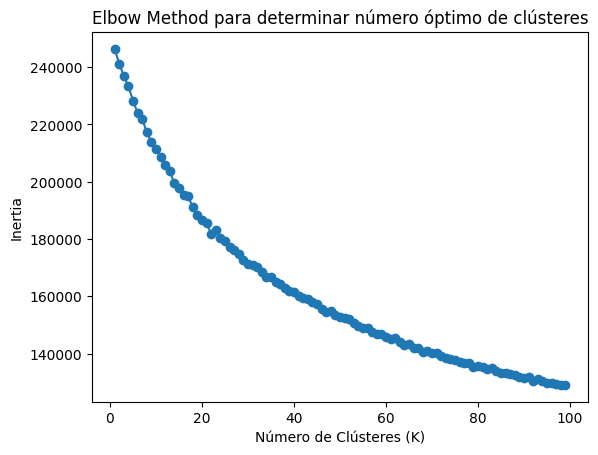

In [10]:
# Determinar el número óptimo de clústeres utilizando Elbow Method
inertia_values = []
k_range = range(1, 100)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_reduced)  # Utilizar la matriz reducida en lugar de la original
    inertia_values.append(kmeans.inertia_)

# Graficar Elbow Method
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method para determinar número óptimo de clústeres')
plt.show()

In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Reducir dimensionalidad con Truncated SVD
svd = TruncatedSVD(n_components=100)  # Puedes ajustar el número de componentes según tus necesidades
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# Determinar el número óptimo de clústeres utilizando Silhouette Score
silhouette_scores = []
k_range = range(2, 11)  # Prueba con valores de K desde 2 hasta 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_reduced)  # Utilizar la matriz reducida en lugar de la original
    silhouette_avg = silhouette_score(tfidf_reduced, cluster_labels)  # Calcular el Silhouette Score con la matriz reducida
    silhouette_scores.append(silhouette_avg)

# Graficar Silhouette Score
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar número óptimo de clústeres')
plt.show()

c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Determinar el número óptimo de clústeres utilizando Silhouette Score
silhouette_scores = []
k_range = range(2, 101)  # Prueba con valores de K desde 2 hasta 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_reduced)  # Utilizar la matriz reducida en lugar de la original
    silhouette_avg = silhouette_score(tfidf_reduced, cluster_labels)  # Calcular el Silhouette Score con la matriz reducida
    silhouette_scores.append(silhouette_avg)

# Graficar Silhouette Score
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para determinar número óptimo de clústeres')
plt.show()

c:\Users\dhumb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


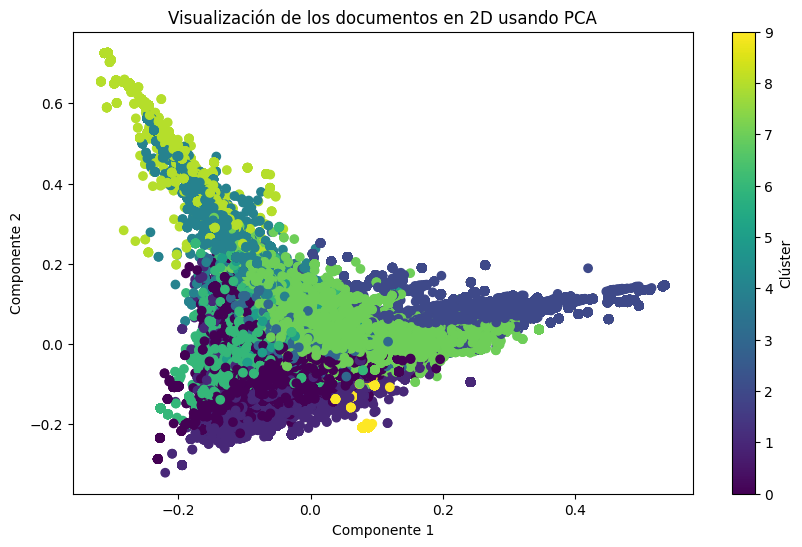

In [12]:
# Ejecutar K-Means con k=10
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_reduced)

# Agregar las etiquetas de los clústeres al DataFrame
data['Cluster'] = cluster_labels

# Visualización en 2D utilizando PCA para reducción de dimensionalidad
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_reduced)
reduced_df = pd.DataFrame(reduced_features, columns=['Componente 1', 'Componente 2'])
reduced_df['Cluster'] = cluster_labels

# Gráfico de dispersión con colores según los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['Componente 1'], reduced_df['Componente 2'], c=reduced_df['Cluster'], cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización de los documentos en 2D usando PCA')
plt.colorbar(label='Clúster')
plt.show()

In [ ]:
# Ejecutar K-Means con k=100
kmeans = KMeans(n_clusters=100, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_reduced)

# Agregar las etiquetas de los clústeres al DataFrame
data['Cluster'] = cluster_labels

# Visualización en 2D utilizando PCA para reducción de dimensionalidad
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_reduced)
reduced_df = pd.DataFrame(reduced_features, columns=['Componente 1', 'Componente 2'])
reduced_df['Cluster'] = cluster_labels

# Gráfico de dispersión con colores según los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(reduced_df['Componente 1'], reduced_df['Componente 2'], c=reduced_df['Cluster'], cmap='viridis')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización de los documentos en 2D usando PCA')
plt.colorbar(label='Clúster')
plt.show()

In [ ]:
data.to_csv("../data/cluster_data.csv", index=False)